# DAV 6150 Module 5 Assignment - Classification Model Performance Metrics
Brian Livian, Alejandra Zapata, Ke Chen

#### 1) Load the provided M5_Data.csv file to your DAV 6150 Github Repository.
#### 2) Then, using a Jupyter Notebook, read the data set from your Github repository and load it into a Pandas dataframe.

In [1]:
# import pandas libraries for dataframe loading
import pandas as pd
# read data into dataframe
path='https://raw.githubusercontent.com/brianlivian/DAV-6150--Data-Science/main/M5_Data.csv'
df=pd.read_csv(path)
# check loading
df.head()

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491


#### 3) Use Pandas’ crosstab() function to calculate the contents of a confusion matrix for the data. Make sure you closely examine the output e.g., do the rows represent the actual or the predicted classification? What about the columns?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# take a closer look at the result and target columns
df_re = df[['class', 'scored.class', 'scored.probability']]
df_re.head()

,class,scored.class,scored.probability
0,0,0,0.328452
1,0,0,0.273190
2,1,0,0.109660
3,0,0,0.055998
4,0,0,0.100491


In [3]:
# Display crosstab of class and scored.class
crosstab = pd.crosstab(df['class'], df['scored.class'])
crosstab

scored.class,0,1
class,,
0,119,5
1,30,27


According to the shape of the data frame, we assume the rows represent the actual classification, while the columns represent the predicted classification.

In [4]:
# use value_counts() to calculate the case numbers of each classification
print(df['class'].value_counts())
print('')
print(df['scored.class'].value_counts())

0    124
1     57
Name: class, dtype: int64

0    149
1     32
Name: scored.class, dtype: int64


The first row 119+5=124, which is the 0 counts of the actual classification. The second row 30+27=57, which is the 1 counts of the actual classification. The first column 119+30=149, which is the 0 counts of the predicted classification, and the second column 5+27=32, which is the 1 counts of the predicted classification. It is the same as our assumption above.<br>
<br>
Based on using the crosstab() function, we are able to print the frequency at which groups of the class and scored class values happen. In this case, we set 0 as negative and 1 as positive, tn represents true negative, tp represents true positive, fp represents false positive and fn represents false negative.

In [5]:
# actual negative, predicted negative
tn = crosstab[0][0]
# actual positive, predicted positive
tp = crosstab[1][1]
# actual negative, predicted positive
fp = crosstab[1][0]
# actual positive, predicted negative
fn = crosstab[0][1]
print(tn, tp, fn, fp)

119 27 30 5


#### 5) Write a Python function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the accuracy metric for the predictions without utilizing any pre-built Python accuracy metric calculation functions.

In [6]:
def accuracy(true, predict):
    # get the confusion matrix of the true and predict columns 
    crosstab = pd.crosstab(true, predict)
    # calculate the counts of true positive, true negative, false positive and false negative
    tn = crosstab[0][0]
    tp = crosstab[1][1]
    fp = crosstab[1][0]
    fn = crosstab[0][1]
    # calculate the accuracy
    return((tp+tn)/(tp+tn+fp+fn))

# try the function
accuracy(df['class'], df['scored.class'])

0.8066298342541437

Based on the formular for accuracy, we used the crosstab() function to declare the true negative (tn), true positive (tp), false positive (fp), and false negative (fn). The function will take the values for any two variables and calculate the accuracy using the formula and crosstab method.

#### 6) Write a Python function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the precision metric for the predictions without utilizing any pre-built Python classification metric calculation functions.

In [7]:
def precision(true, predict):
    # get the confusion matrix of the true and predict columns
    crosstab = pd.crosstab(true, predict)
    # calculate the counts of true positive and false positive
    tp = crosstab[1][1]
    fp = crosstab[1][0]
    # calculate the precision
    return((tp)/ (tp+fp))

# try the function
precision(df['class'], df['scored.class'])

0.84375

For precision, we used the formula to create the function. The formula only requires the true positive (tp), and false positive (fp), and therefore we only create those variables in the function. We test the function with our function and obtained a value of 0.84375. The score of 1.0 means the model does not produces false positives so therefore with a 0.84 we know we may have some false positives.

#### 7) Write a Python function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the sensitivity metric for the predictions without utilizing any pre-built Python classification metric calculation functions.

In [8]:
def sensitivity(true, predict):
    # get the confusion matrix of the true and predict columns
    crosstab = pd.crosstab(true, predict)
    # calculate the counts of true positive and false negative
    tp = crosstab[1][1]
    fn = crosstab[0][1]
    # calculate the sensitivity
    return((tp)/ (tp+fn))

# try the function
sensitivity(df['class'], df['scored.class'])

0.47368421052631576

Based on our research, the sensitivity formula is similar to precision, but it uses the false negatives instead of the false positives. It is trying to identify the rate at which positive observations occur so therefor we create those two variables and then ask the function to return the result of the formula. In this case, the score may indicate that sometimes the model fails to identify the true positive cases.

#### 8) Write a Python function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the specificity metric for the predictions without utilizing any pre-built Python classification metric calculation functions.

In [9]:
def specificity(true,predict):
    # get the confusion matrix of the true and predict columns
    crosstab = pd.crosstab(true, predict)
    # calculate the counts of true negative and false positive
    tn = crosstab[0][0]
    fp = crosstab[1][0]
    # calculate the specificity
    return((tn)/(tn+fp))

# try the function
specificity(df['class'], df['scored.class'])

0.9596774193548387

Now we create the specificity function to find the number of actual negatives. For this formula we see the relationship between true negatives and false positives. By dividing the true negative over the total true negative and false positive  we obtain the measure of specificity. The score for our model indicates that we have a model that is good at predicting the actual negatives.

#### 9) Write a Python function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the F1 Score metric for the predictions without utilizing any pre-built Python classification metric calculation functions.

In [10]:
def f1(true, predict):
    # get the confusion matrix of the true and predict columns
    crosstab = pd.crosstab(true, predict)
    # calculate the counts of true positive, true negative, false positive and false negative
    tn = crosstab[0][0]
    tp = crosstab[1][1]
    fp = crosstab[1][0]
    fn = crosstab[0][1]
    # calculate the precision and recall
    precision = (tp)/ (tp+fp)
    recall = (tp)/ (tp+fn)
    return((2*precision*recall)/ (precision+recall))

# try the function
f1(df['class'], df['scored.class'])

0.6067415730337079

F1, is a measure for precision and recall so therefore we first calculate these two metrics within the function to then return the actual F1 score. The formula defines it as the twice the product of precision and recall over the sum of the scores. It helps us understand the balance between both measures.

The result in this case shows that we do have some false positives and false negatives by outputting a score of 0.60.

#### 10) Write a Python function to plot a ROC curve and also calculate AUC for any binary classification data that contains both actual and predicted classifications as well as the associated scored probabilities without utilizing any pre-built Python classification metric calculation or ROC or AUC functions.

The function logic flow is: 
1. Set a list of thresholds. The threshold will be increase from 0 to 1 with step 0.005, for smoothen the curve. 
2. Create two lists for containing the true positive rate and false positive rate under different threshold.
3. Under each threshold, create a list for containing the prediction result of the scored probability, and variables for calculating true positive, true negative, false positive and false negative counts.
4. Under a certain threshold, loop the probability element by element, determine the result and compare with the actual result, then update the correctness of the classification.
5. After finishing this threshold, add the true positive rate and false positive rate to the lists till all thresholds being checked. 
6. Plot the curve and calculate the area under curve.

In [11]:
def ROC_CURVE(real,prob):
    # set different threshold, smaller steps will smooth the curve
    threshold=np.arange(0, 1.001, 0.005).tolist()
    # create true positive rate list and false positive rate list
    tpr_func=[]
    fpr_func=[]
    # under each threshold, do the following:
    for i in threshold:
        # empty list for containing the prediction result
        df_new=[]
        # set correctness of the classification
        tn_func=0
        tp_func=0
        fp_func=0
        fn_func=0
        # loop the probability
        for j in range(len(prob)):
            # if determined as positive
            if prob[j]>=i:
                df_new.append(int(1))
                # update correctness of the classification
                if ((real[j]==df_new[j]==1)):
                    tp_func=tp_func+1
                elif ((real[j]==0) & (df_new[j]==1)):
                    fp_func=fp_func+1
            # if determined as negative
            else:
                df_new.append(int(0))
                # update correctness of the classification
                if ((real[j]==1) & (df_new[j]==0)):
                    fn_func=fn_func+1
                elif ((real[j]==df_new[j]==0)):
                    tn_func=tn_func+1
        # close the file under this threshold and update the tpr and fpr
        tpr_func.append(tp_func/(tp_func+fn_func))
        fpr_func.append(fp_func/(fp_func+tn_func))
        
    # plotting curve based on the tpr and fpr
    plt.plot(fpr_func, tpr_func, linestyle='--', label='ROC curve', clip_on=False)
    plt.plot([0,1],[0,1],linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC CURVE')
    plt.legend()
    plt.show()
    
    # Also calculating the area under the curve
    print('The AUC score is '+str(-np.trapz(tpr_func,x=fpr_func))+'.')

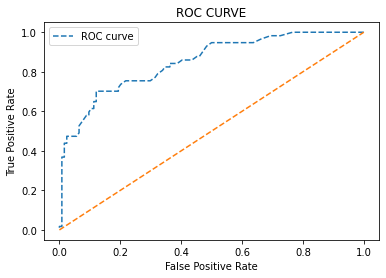

The AUC score is 0.8498160724391625.


In [12]:
# test the funciton
real1=df['class']
prob1=df['scored.probability']
ROC_CURVE(real1,prob1)

Given that our ROC Curve is approximating the top left we can infere that the relationship between sensitivity and specificity is performing well. In our function, we define the calculation for each of those metrics and then plot it as the ROC Curve. The AUC calculation shows a 0.84 so our model can be considered good.

#### 11) Apply the Python functions you’ve created to the relevant columns of the provided data set to produce the classification metrics specified in steps 5 through 9 of this assignment.

Please see the output of each function below the question description.

#### 12) Now compare the output of your functions against the output of the pre-built functions available within the scikit-learn library. Specifically, apply the confusion_matrix(), accuracy_score(), precision_score(), recall_score() (remember: recall = sensitivity), f1_score(), and the metrics.classification_report() functions to the relevant columns of the provided data set. Discuss how well the results of these pre-built functions compare to those of the functions you’ve created for this assignment.

In [13]:
# Another method to show confusion matrix with sklearn
from sklearn.metrics import confusion_matrix
df1 = pd.DataFrame(
    confusion_matrix(df['class'], df['scored.class']),
    columns = ['Predict 0', 'Predict 1'],
    index = ['True 0', 'True 1']
)
df1

,Predict 0,Predict 1
True 0,119,5
True 1,30,27


In [14]:
# import all the pre-built functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

print("Accuracy score is "+str(accuracy_score(df['class'], df['scored.class'])))
print("Precision score is "+str(precision_score(df['class'], df['scored.class'])))
print("recall score is "+str(recall_score(df['class'], df['scored.class'])))
print("F1 score is "+str(f1_score(df['class'], df['scored.class'])))
print(classification_report(df['class'], df['scored.class']))

Accuracy score is 0.8066298342541437
Precision score is 0.84375
recall score is 0.47368421052631576
F1 score is 0.6067415730337079
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       124
           1       0.84      0.47      0.61        57

    accuracy                           0.81       181
   macro avg       0.82      0.72      0.74       181
weighted avg       0.81      0.81      0.79       181



The results of the pre-built functions are the same as the results we got from the functions we created. Our functions accurately calculated accuracy, precision, recall and the F1 score. The pre-built functions are easy to use, however, through this exercise we understand better the formulas, definition and uses of each metric and can move to quickly calculate the metrics using built in libraries.

#### 13) Using the metrics.plot_roc_curve () and metrics.auc() functions from the scikit-learn package to generate a ROC plot and calculate AUC for the provided data set. How do the results compare with the ROC/AUC function you’ve created for this assignment?

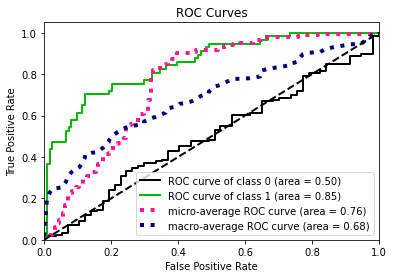

In [15]:
'''******* pip install scikit-plot is needed for the following attempt ********'''
# import libraries after install scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn import metrics
y_true=df['class']
# need to be 2D-array
y_probas=df['scored.probability'].reset_index().values
# Function plot_roc_curve is deprecated, need to use scikitplot.metrics.plot_roc
skplt.metrics.plot_roc(y_true, y_probas)
plt.show()

In [16]:
from sklearn.metrics import roc_auc_score
roc_auc_score(df['class'], df['scored.probability'])

0.8503112620260327

The curve for class 1 closely resembled our defined function that shows a good model, however the AUC calculation from the function and built in library were slightly different but almost the same, so there may be more precision on the built in library. The result may vary because of the threshold numbers.
Furthermore, we have expanded our knowledge on the use of performance metrics and binary classification. As we move forward to creating more complex models the use of the performance metrics will be an aid to measure its performance.

# Resoruces
1. https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
2. https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
3. https://numpy.org/doc/stable/reference/generated/numpy.trapz.html
4. https://scikit-plot.readthedocs.io/en/stable/metrics.html
5. https://mmuratarat.github.io/2019-10-01/how-to-compute-AUC-plot-ROC-by-hand